In [1]:
# load Initial Library

import pandas as pd
import numpy as np

In [2]:
# Load Data

df = pd.read_csv("walmart-sales-dataset-of-45stores.csv")
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [4]:
df["Fuel_Price"] = round(df["Fuel_Price"],2)
df["CPI"] = round(df["CPI"],2)
df["Unemployment"] = round(df["Unemployment"],2)
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.57,211.10,8.11
1,1,12-02-2010,1641957.44,1,38.51,2.55,211.24,8.11
2,1,19-02-2010,1611968.17,0,39.93,2.51,211.29,8.11
3,1,26-02-2010,1409727.59,0,46.63,2.56,211.32,8.11
4,1,05-03-2010,1554806.68,0,46.50,2.62,211.35,8.11
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,4.00,192.01,8.68
6431,45,05-10-2012,733455.07,0,64.89,3.98,192.17,8.67
6432,45,12-10-2012,734464.36,0,54.47,4.00,192.33,8.67
6433,45,19-10-2012,718125.53,0,56.47,3.97,192.33,8.67


## 0. Exploratory Data Analysis

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
round(df.describe(),2)

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.00,6435.00,6435.00,6435.00,6435.00,6435.00,6435.00
mean,23.00,1046964.88,0.07,60.66,3.36,171.58,8.00
std,12.99,564366.62,0.26,18.44,0.46,39.36,1.88
min,1.00,209986.25,0.00,-2.06,2.47,126.06,3.88
25%,12.00,553350.10,0.00,47.46,2.93,131.74,6.89
50%,23.00,960746.04,0.00,62.67,3.44,182.62,7.87
75%,34.00,1420158.66,0.00,74.94,3.74,212.74,8.62
max,45.00,3818686.45,1.00,100.14,4.47,227.23,14.31


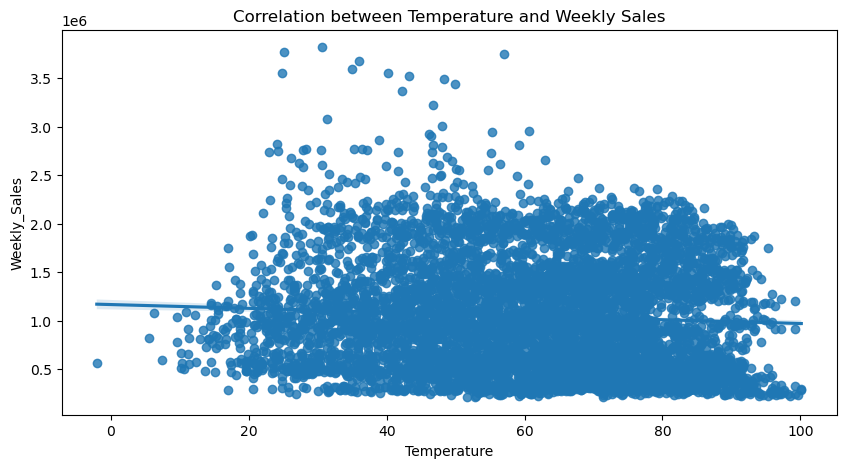

In [7]:
fig, ax = plt.subplots(figsize = (10, 5))
ax = sns.regplot(data = df, x = 'Temperature', y = 'Weekly_Sales')
ax.set(title = 'Correlation between Temperature and Weekly Sales');

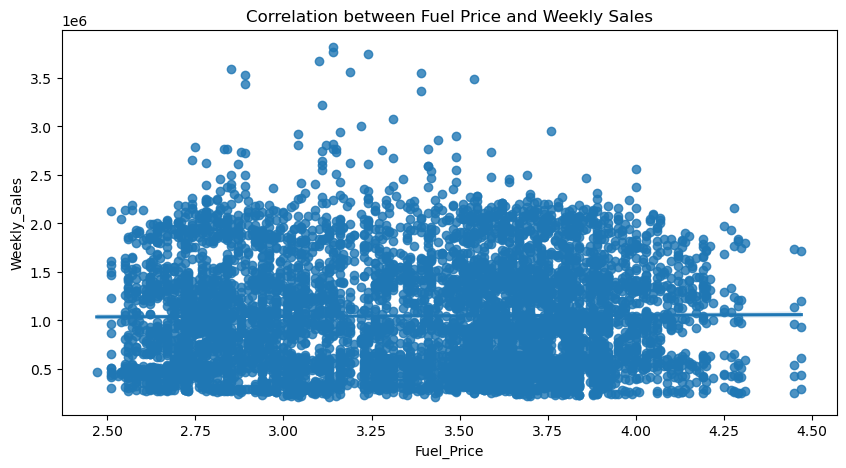

In [8]:
fig, ax = plt.subplots(figsize = (10, 5))
ax = sns.regplot(data = df, x = 'Fuel_Price', y = 'Weekly_Sales')
ax.set(title = 'Correlation between Fuel Price and Weekly Sales');

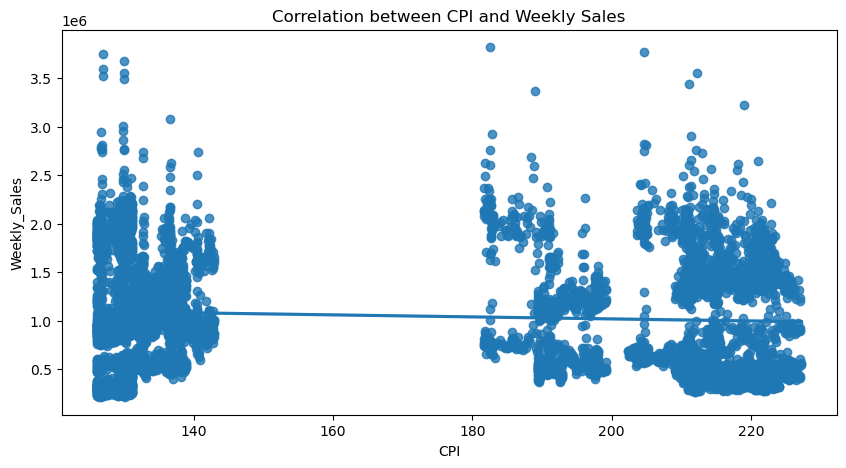

In [9]:
fig, ax = plt.subplots(figsize = (10, 5))
ax = sns.regplot(data = df, x = 'CPI', y = 'Weekly_Sales')
ax.set(title = 'Correlation between CPI and Weekly Sales');

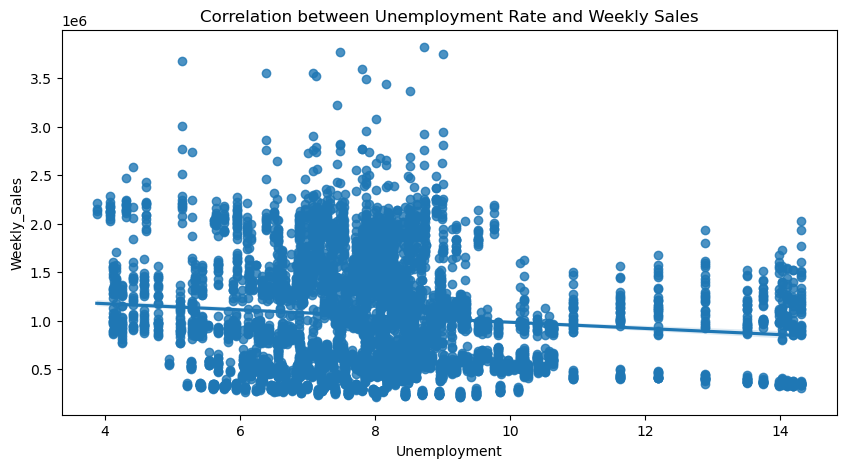

In [10]:
fig, ax = plt.subplots(figsize = (10, 5))
ax = sns.regplot(data = df, x = 'Unemployment', y = 'Weekly_Sales')
ax.set(title = 'Correlation between Unemployment Rate and Weekly Sales');

In [11]:
sum_sales = df.groupby(['Store']).agg(Sum_Sales=("Weekly_Sales", 'sum')).reset_index()

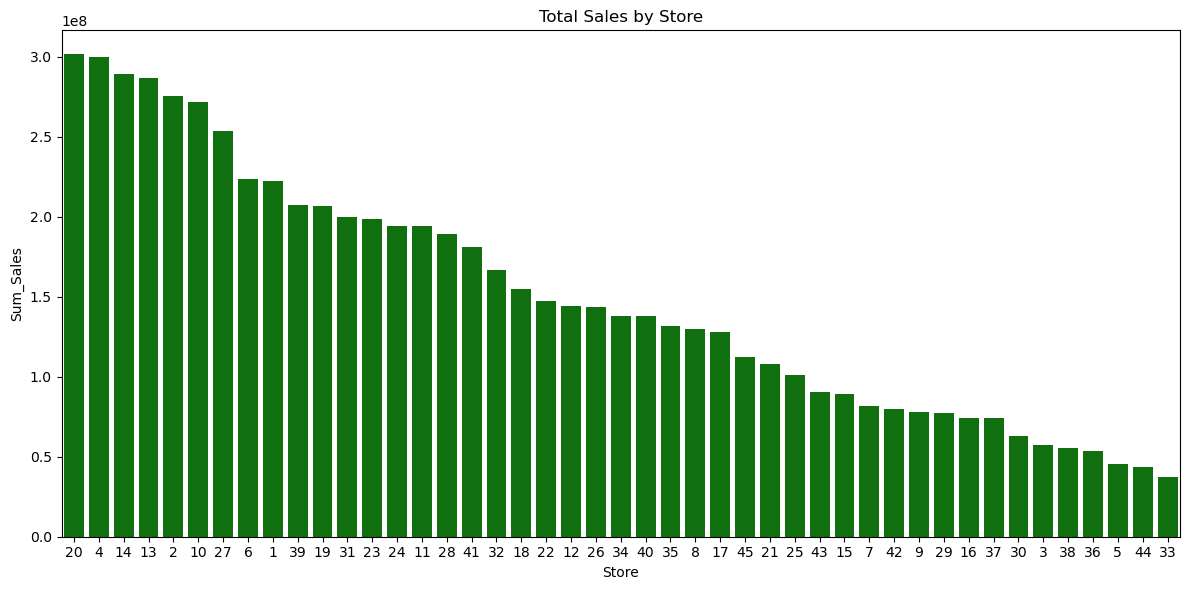

In [12]:
# Membuat Plot
fig, ax = plt.subplots(figsize=(12,6),ncols=1, nrows=1)

# Plot
ax = sns.barplot(data=sum_sales, 
             x="Store", 
             y="Sum_Sales",
             color="green",
             orient="v",
             order=sum_sales.sort_values('Sum_Sales', ascending=False).Store)

# Kustomisasi             
ax.set(title="Total Sales by Store")

plt.tight_layout()
plt.show()

# 1. Tujuan Proyek

Walmart Inc. salah satu perusahaan retail dari Amerika Serikat. Berdasarkan data per 31 Juli 2022 Warlmart memiliki 10.585 store di 24 negara yang beroperasi dibawah 46 nama yang berbeda, dimana di analisis data berikut dipilih 45 store. Tujuan dari proyek ini antara lain:

1. Melakukan Uji Statistik (Statistical Test) untuk menarik Hipotesis apakah Pendapatan Mingguan (Weekly Sales) pada hari libur dengan hari biasa lebih tinggi atau lebih rendah. Dan berapakah kisaran perbedaan Pendapatan Mingguannya (Weekly Sales)


2. Membangun Regression Model untuk melakukan Identifikasi hubungan antar variabel dan melakukan Prediksi atau Proyeksi Sales (Forecasting) untuk memperkirakan Pendapatan Perusahaan secara mingguan dari variabel yang terkandung dalam data berikut

# 2. Statistical Test

Hipothesis yang kita uji adalah:
$$H_0: \mu(holiday) \geq \mu(non-holiday)$$
$$H_1: \mu(holiday) <  \mu(non-holiday)$$

In [13]:
df[df['Holiday_Flag']==0]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.57,211.10,8.11
2,1,19-02-2010,1611968.17,0,39.93,2.51,211.29,8.11
3,1,26-02-2010,1409727.59,0,46.63,2.56,211.32,8.11
4,1,05-03-2010,1554806.68,0,46.50,2.62,211.35,8.11
5,1,12-03-2010,1439541.59,0,57.79,2.67,211.38,8.11
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,4.00,192.01,8.68
6431,45,05-10-2012,733455.07,0,64.89,3.98,192.17,8.67
6432,45,12-10-2012,734464.36,0,54.47,4.00,192.33,8.67
6433,45,19-10-2012,718125.53,0,56.47,3.97,192.33,8.67


In [14]:
df[df['Holiday_Flag']==1]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1,1,12-02-2010,1641957.44,1,38.51,2.55,211.24,8.11
31,1,10-09-2010,1507460.69,1,78.69,2.56,211.50,7.79
42,1,26-11-2010,1955624.11,1,64.52,2.74,211.75,7.84
47,1,31-12-2010,1367320.01,1,48.43,2.94,211.40,7.84
53,1,11-02-2011,1649614.93,1,36.39,3.02,212.94,7.74
...,...,...,...,...,...,...,...,...
6375,45,09-09-2011,746129.56,1,71.48,3.74,186.67,8.62
6386,45,25-11-2011,1170672.94,1,48.71,3.49,188.35,8.52
6391,45,30-12-2011,869403.63,1,37.79,3.39,189.06,8.52
6397,45,10-02-2012,803657.12,1,37.00,3.64,189.71,8.42


In [15]:
# data group 1
holiday = np.array(df['Weekly_Sales'].loc[df['Holiday_Flag']==1])
holiday.shape

(450,)

In [16]:
# data group 2
non_holiday = np.array(df['Weekly_Sales'].loc[df['Holiday_Flag']==0].sample(n=450))
non_holiday.shape

(450,)

In [17]:
# checking variance
print(np.var(holiday))
print(np.var(non_holiday))
print(np.var(holiday) == np.var(non_holiday))

393112843994.82806
301754032401.63696
False


In [18]:
def hypo_test(col_1, col_2, alternate, alpha=0.05):
    
    from scipy.stats import ttest_ind
    
    stat, p = ttest_ind(a=col_1, b=col_2, equal_var=False, alternative=alternate)

    print('Statistics = %.2f, p-value = %.2f' % (stat,p))
    print('Alpha =', alpha)
    
    if p > alpha:
        print('Failed to Reject Null Hypothesis (Gagal Tolak H0)')
    else:
        print('Reject Null Hypothesis (Tolak H0)')

In [19]:
hypo_test(col_1=holiday, col_2=non_holiday, alternate="less")

Statistics = 3.00, p-value = 1.00
Alpha = 0.05
Failed to Reject Null Hypothesis (Gagal Tolak H0)


In [20]:
def conf_interval(col_1, col_2, alpha=0.05):

    from statsmodels.stats.weightstats import DescrStatsW, CompareMeans

    cm = CompareMeans(d1 = DescrStatsW(data=col_1), 
                      d2 = DescrStatsW(data=col_2))

    lower, upper = cm.tconfint_diff(alpha=alpha, 
                                    alternative='two-sided', 
                                    usevar='unequal')

    print("Confidence Interval", ":", "[", lower,"," , upper, "]")

In [21]:
conf_interval(col_1=holiday, col_2=non_holiday)

Confidence Interval : [ 40644.464915457385 , 195063.77072898744 ]


# 3. Regression Model

## 3.1 Pengecekan Koefisien Korelasi `Weekly_Sales` dengan variabel lainnya

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
corr = df.corr()
corr

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,1.000000e+00,-0.335332,-4.386841e-16,-0.022659,0.059940,-0.209492,0.223497
Weekly_Sales,-3.353320e-01,1.000000,3.689097e-02,-0.063810,0.009515,-0.072634,-0.106198
Holiday_Flag,-4.386841e-16,0.036891,1.000000e+00,-0.155091,-0.078021,-0.002162,0.010962
Temperature,-2.265908e-02,-0.063810,-1.550913e-01,1.000000,0.144870,0.176887,0.101086
Fuel_Price,5.993999e-02,0.009515,-7.802135e-02,0.144870,1.000000,-0.170570,-0.035116
CPI,-2.094922e-01,-0.072634,-2.161542e-03,0.176887,-0.170570,1.000000,-0.302068
Unemployment,2.234965e-01,-0.106198,1.096157e-02,0.101086,-0.035116,-0.302068,1.000000


<AxesSubplot:>

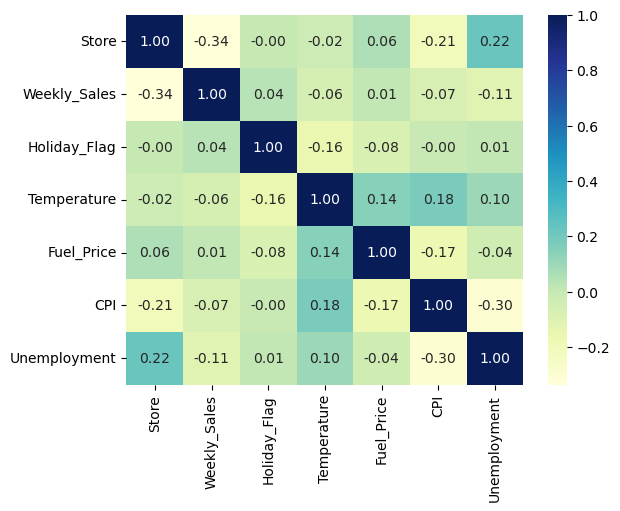

In [24]:
sns.heatmap(corr, 
            annot=True,
            fmt=".2f",
            cmap="YlGnBu")

In [25]:
import statsmodels.formula.api as smf

In [26]:
def print_coef_std_err(results):
    """
    Function to combine estimated coefficients and standard error in one DataFrame
    :param results: <statsmodels RegressionResultsWrapper> OLS regression results from 
    :return df: <pandas DataFrame> 
    """
    coef = results.params
    std_err = results.bse
    
    df = pd.DataFrame(data = np.transpose([coef, std_err]), 
                      index = coef.index, 
                      columns=["coef","std err"])
    return df

## 3.1 Pembangunan Model Regresi menggunakan variabel tunggal `Holiday_Flag`

In [27]:
# Create OLS model object
model = smf.ols("Weekly_Sales ~ Holiday_Flag", df)

# Fit the model
results_model = model.fit()

# Extract the results (Coefficient and Standard Error) to DataFrame
results_sales1 = print_coef_std_err(results_model)

In [28]:
round(results_sales1,2)

,coef,std err
Intercept,1041256.38,7290.67
Holiday_Flag,81631.51,27569.91


$$\text{Weekly_Sales} = 1041256.38 + (\text{Holiday_Flag}*81631.51)$$

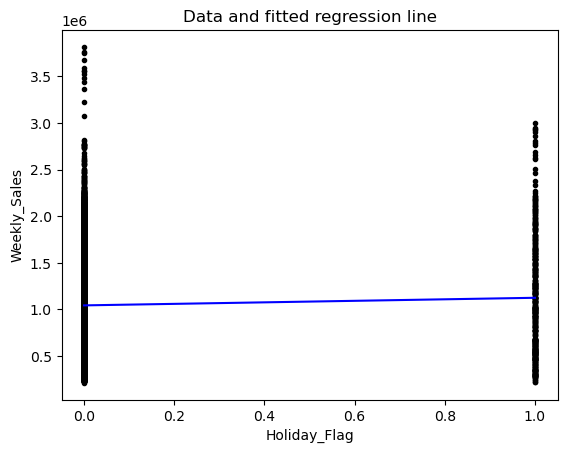

In [29]:
predictor = "Holiday_Flag"
outcome = "Weekly_Sales"
data = df.copy()
results_ = results_sales1.copy()

# Plot the data
plt.scatter(data[predictor], data[outcome], color = "k", marker=".")

# Calculate the fitted values
a_hat = results_.loc["Intercept"]["coef"]
b_hat = results_.loc[predictor]["coef"]

x_domain = np.linspace(np.min(data[predictor]), np.max(data[predictor]), 10000)

fitted_values = a_hat + b_hat * x_domain

# Plot the fitted line
plt.plot(x_domain, fitted_values, label="Fitted line", color = "b")

# Add a legend and labels
# plt.legend()
plt.ylabel(outcome)
plt.xlabel(predictor)

# Add a title and adjust the margins
plt.title("Data and fitted regression line")

# Show the plot
plt.show()

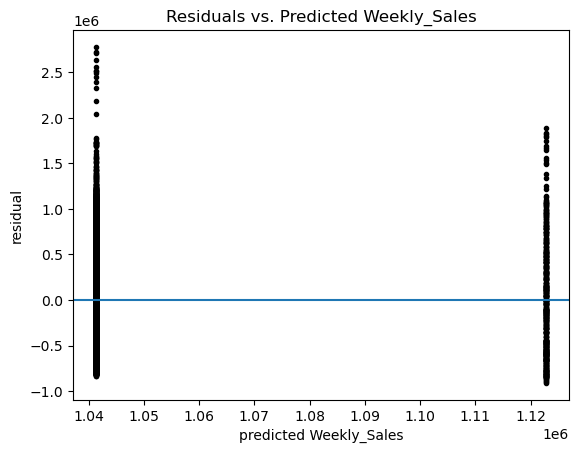

In [30]:
# Residual Plot
plt.scatter(results_model.fittedvalues, results_model.resid, marker=".", c = "k")

# Plot the horizontal line in 0 as the fitted line
plt.axhline([0])

plt.xlabel("predicted Weekly_Sales")
plt.ylabel("residual")
plt.title(f"Residuals vs. Predicted Weekly_Sales");

In [31]:
# cross validation using statsmodel prepartion
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.metrics import r2_score

from sklearn.model_selection import cross_val_score, cross_validate, KFold

In [32]:
class StatsmodelsRegressor(BaseEstimator, RegressorMixin):
    """ A universal sklearn-style wrapper for statsmodels regressors """
    
    def __init__(self, sm_class, sm_formula):
        self.sm_class = sm_class
        self.sm_formula = sm_formula
        self.model = None
        self.result = None
 
    def fit(self, data, dummy):
        self.model = self.sm_class(self.sm_formula, data)
        self.result = self.model.fit()
 
    def predict(self,X):
        return self.result.predict(X)

def kfold_split(data, n_fold):
    """
    Function to combine estimated coefficients and standard error in one DataFrame
    :param data: <pandas DataFrame> 
    :param n_fold: <int> Number of fold in k-fold CV
    :return fold_train: <pandas DataFrame> Training Data
    :return fold_test: <pandas DataFrame> Testing Data
    """
    kfold = KFold(n_splits = n_fold, 
                  shuffle = True, 
                  random_state=123)
    fold_train = {}
    fold_test = {}

    for i, (train, test) in enumerate(kfold.split(data)):
        print(f"fold {i+1}, train data rows: {len(train)}, test data rows: {len(test)}")
        fold_train[i] = data.iloc[train].copy()
        fold_test[i] = data.iloc[test].copy()
        
    return (fold_train, fold_test)

In [33]:
# Create a class model

ols_holiday = StatsmodelsRegressor(smf.ols, "Weekly_Sales ~ Holiday_Flag")

In [34]:
# Create k-fold splitter object

kfold = KFold(n_splits=5, shuffle = True, random_state=123)

In [35]:
scores_ols_holiday = cross_val_score(estimator = ols_holiday,
                                       X = df,
                                       y = df['Weekly_Sales'],
                                       cv = kfold,
                                       scoring = "r2")
scores_ols_holiday = pd.DataFrame(data = scores_ols_holiday, 
                                    columns=["test_rsquared"])
scores_ols_holiday["folds"] = [f"Folds {i+1}" for i in range(5)]
scores_ols_holiday

,test_rsquared,folds
0,0.002711,Folds 1
1,-0.002796,Folds 2
2,-0.002121,Folds 3
3,-0.002212,Folds 4
4,0.002421,Folds 5


In [36]:
scores_ols_holiday["test_rsquared"].mean()

-0.00039949101752065894

## 3.2 Pembangunan Model Regresi menggunakan beberapa variabel `Holiday_Flag` dan `Store`

In [37]:
model = smf.ols('Weekly_Sales ~ Holiday_Flag + Store',df)

# Fit the model
results_model = model.fit()

# Extract the results (Coefficient and Standard Error) to DataFrame
results_sales2 = print_coef_std_err(results_model)

In [38]:
round(results_sales2,2)

,coef,std err
Intercept,1376388.30,13593.75
Holiday_Flag,81631.51,25973.39
Store,-14570.95,510.04


$$\text{Weekly_Sales} = 1376388.30 + (\text{Holiday_Flag}*81631.51) - (\text{Store}*14570.95)$$

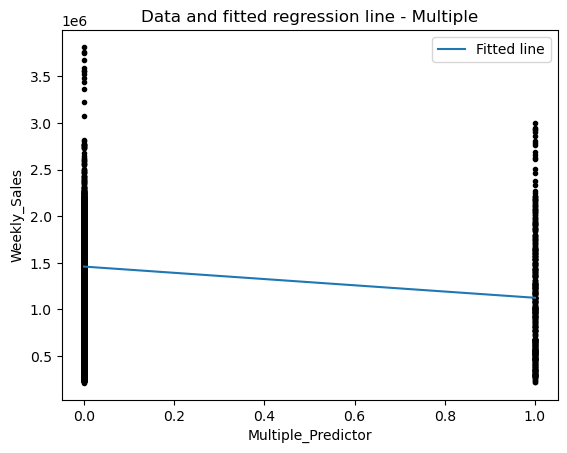

In [39]:
predictors = ["Holiday_Flag", "Store"]
outcome = "Weekly_Sales"
data = df.copy()
results_ = results_sales2.copy()
#linestyles = {0 : "--", 1: "-"}
#c = {0 : "b", 1: "g"}
#markers = {0 : "x", 1: "."}

# Plot the data
plt.scatter(data[predictors[0]], data[outcome], color = "k", marker=".")


# x value predictors value
x_domain = np.linspace(np.min(data[predictors[0]]), np.max(data[predictors[0]]), len(data))

# Calculate the fitted values for two lines regarding the mom_hs (0 and 1)
beta0_hat = results_.loc["Intercept"]["coef"]
beta1_hat = results_.loc[predictors[0]]["coef"]
beta2_hat = results_.loc[predictors[1]]["coef"]

fitted_values_multiple = beta0_hat +  beta1_hat + beta2_hat * x_domain * data[predictors[1]].mean()

# Plot two fitted line
plt.plot(x_domain, fitted_values_multiple, label = f"Fitted line")

# Add a legend and labels
plt.legend()
plt.ylabel(f"Weekly_Sales")
plt.xlabel(f"Multiple_Predictor")

# Add a title and adjust the margins
plt.title("Data and fitted regression line - Multiple")

# Show the plot
plt.show()

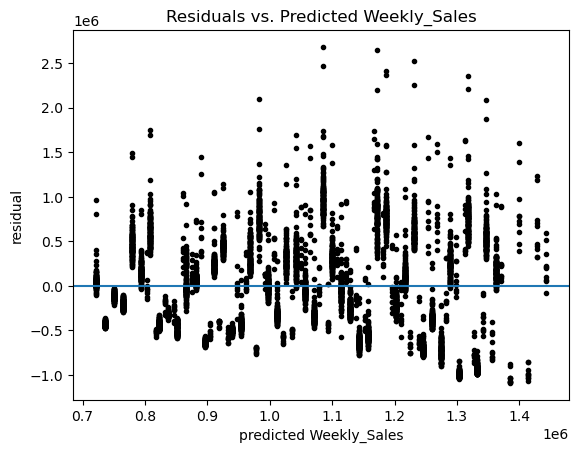

In [40]:
# Residual Plot
plt.scatter(results_model.fittedvalues, results_model.resid, marker=".", c = "k")

# Plot the horizontal line in 0 as the fitted line
plt.axhline([0])

plt.xlabel("predicted Weekly_Sales")
plt.ylabel("residual")
plt.title(f"Residuals vs. Predicted Weekly_Sales");

In [41]:
# Create a class model

ols_multiple = StatsmodelsRegressor(smf.ols, "Weekly_Sales ~ Holiday_Flag + Store")

In [42]:
# Create k-fold splitter object

kfold = KFold(n_splits=5, shuffle = True, random_state=123)

In [43]:
scores_ols_multiple = cross_val_score(estimator = ols_multiple,
                                       X = df,
                                       y = df['Weekly_Sales'],
                                       cv = kfold,
                                       scoring = "r2")
scores_ols_multiple = pd.DataFrame(data = scores_ols_multiple, 
                                    columns=["test_rsquared"])
scores_ols_multiple["folds"] = [f"Folds {i+1}" for i in range(5)]
scores_ols_multiple

,test_rsquared,folds
0,0.104411,Folds 1
1,0.100018,Folds 2
2,0.103887,Folds 3
3,0.118841,Folds 4
4,0.133069,Folds 5


In [44]:
scores_ols_multiple["test_rsquared"].mean()

0.11204519148663494

## 3.3 Pembangunan Model Regresi menggunakan semua variabel terkecuali `Date`

In [45]:
model = smf.ols('Weekly_Sales ~ Holiday_Flag + Store + Temperature + Fuel_Price + CPI + Unemployment',df)

# Fit the model
results_model = model.fit()

# Extract the results (Coefficient and Standard Error) to DataFrame
results_sales3 = print_coef_std_err(results_model)

In [46]:
round(results_sales3,2)

,coef,std err
Intercept,1995966.34,75425.86
Holiday_Flag,73029.46,25942.20
Store,-15388.40,521.89
Temperature,-975.17,375.97
Fuel_Price,9569.71,14807.79
CPI,-2319.79,184.78
Unemployment,-21894.68,3787.86


$$\text{Weekly_Sales} = 1995966.34 + (\text{Holiday_Flag}*73029.46) - (\text{Store}*15388.40) - (\text{Temperature}*975.17) + (\text{Fuel_Price}*9569.71) - (\text{CPI}*2319.79) - (\text{Unemployment}*21894.68)$$

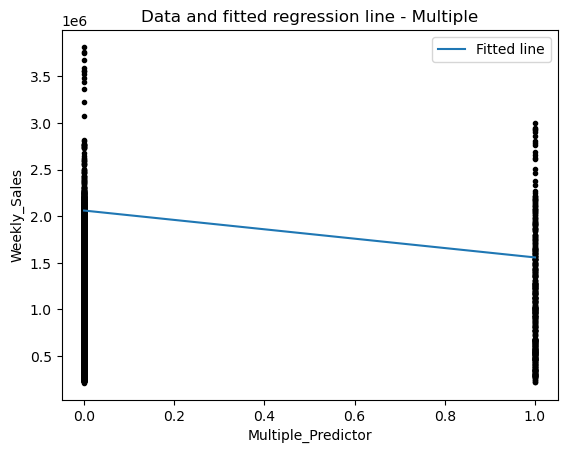

In [47]:
predictors = ["Holiday_Flag", "Store", "Temperature", "Fuel_Price", "CPI", "Unemployment"]
outcome = "Weekly_Sales"
data = df.copy()
results_ = results_sales3.copy()
# linestyles = {0 : "--", 1: "-"}
# c = {0 : "b", 1: "g"}
# markers = {0 : "x", 1: "."}

# Plot the data
plt.scatter(data[predictors[0]], data[outcome], color = "k", marker=".")


# x value predictors value
x_domain = np.linspace(np.min(data[predictors[0]]), np.max(data[predictors[0]]), len(data))

# Calculate the fitted values for two lines regarding the mom_hs (0 and 1)
beta0_hat = results_.loc["Intercept"]["coef"]
beta1_hat = results_.loc[predictors[0]]["coef"]
beta2_hat = results_.loc[predictors[1]]["coef"]
beta3_hat = results_.loc[predictors[2]]["coef"]
beta4_hat = results_.loc[predictors[3]]["coef"]
beta5_hat = results_.loc[predictors[4]]["coef"]
beta6_hat = results_.loc[predictors[5]]["coef"]

fitted_values_multiple = beta0_hat +  beta1_hat + beta2_hat + beta3_hat + beta4_hat + beta5_hat + beta6_hat * x_domain * data[predictors[1]].mean()

# Plot two fitted line
plt.plot(x_domain, fitted_values_multiple, label = f"Fitted line")

# Add a legend and labels
plt.legend()
plt.ylabel(f"Weekly_Sales")
plt.xlabel(f"Multiple_Predictor")

# Add a title and adjust the margins
plt.title("Data and fitted regression line - Multiple")

# Show the plot
plt.show()

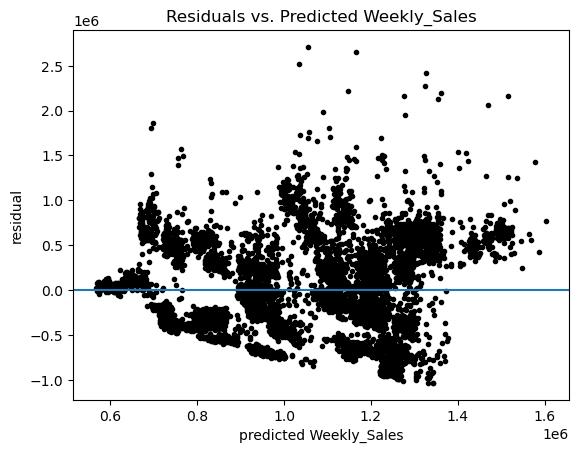

In [48]:
# Residual Plot
plt.scatter(results_model.fittedvalues, results_model.resid, marker=".", c = "k")

# Plot the horizontal line in 0 as the fitted line
plt.axhline([0])

plt.xlabel("predicted Weekly_Sales")
plt.ylabel("residual")
plt.title(f"Residuals vs. Predicted Weekly_Sales");

In [49]:
# Create a class model

ols_multiple1 = StatsmodelsRegressor(smf.ols, "Weekly_Sales ~ Holiday_Flag + Store + Temperature + Fuel_Price + CPI + Unemployment")

In [50]:
# Create k-fold splitter object

kfold = KFold(n_splits=5, shuffle = True, random_state=123)

In [51]:
scores_ols_multiple = cross_val_score(estimator = ols_multiple1,
                                       X = df,
                                       y = df['Weekly_Sales'],
                                       cv = kfold,
                                       scoring = "r2")
scores_ols_multiple = pd.DataFrame(data = scores_ols_multiple, 
                                    columns=["test_rsquared"])
scores_ols_multiple["folds"] = [f"Folds {i+1}" for i in range(5)]
scores_ols_multiple

,test_rsquared,folds
0,0.135823,Folds 1
1,0.127457,Folds 2
2,0.132394,Folds 3
3,0.141695,Folds 4
4,0.157647,Folds 5


In [52]:
scores_ols_multiple["test_rsquared"].mean()

0.13900317252246305

## 3.4 Melakukan Transformasi Log untuk peningkatan performa proyeksi `Weekly_Sales`

In [53]:
df["logTemperature"] = np.log(df["Temperature"])
df["logFuelPrice"] = np.log(df["Fuel_Price"])
df["logCPI"] = np.log(df["CPI"])
df["logUnemployment"] = np.log(df["Unemployment"])
df.dropna(inplace=True)
df

C:\Users\akbar\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,logTemperature,logFuelPrice,logCPI,logUnemployment
0,1,05-02-2010,1643690.90,0,42.31,2.57,211.10,8.11,3.745023,0.943906,5.352332,2.093098
1,1,12-02-2010,1641957.44,1,38.51,2.55,211.24,8.11,3.650918,0.936093,5.352995,2.093098
2,1,19-02-2010,1611968.17,0,39.93,2.51,211.29,8.11,3.687128,0.920283,5.353232,2.093098
3,1,26-02-2010,1409727.59,0,46.63,2.56,211.32,8.11,3.842244,0.940007,5.353374,2.093098
4,1,05-03-2010,1554806.68,0,46.50,2.62,211.35,8.11,3.839452,0.963174,5.353516,2.093098
...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,4.00,192.01,8.68,4.172539,1.386294,5.257547,2.161022
6431,45,05-10-2012,733455.07,0,64.89,3.98,192.17,8.67,4.172694,1.381282,5.258380,2.159869
6432,45,12-10-2012,734464.36,0,54.47,4.00,192.33,8.67,3.997650,1.386294,5.259213,2.159869
6433,45,19-10-2012,718125.53,0,56.47,3.97,192.33,8.67,4.033710,1.378766,5.259213,2.159869


In [54]:
model = smf.ols('Weekly_Sales ~ Holiday_Flag + Store + logTemperature + logFuelPrice + logCPI + logUnemployment',df)

# Fit the model
results_model = model.fit()

# Extract the results (Coefficient and Standard Error) to DataFrame
results_sales4 = print_coef_std_err(results_model)

In [55]:
round(results_sales4,2)

,coef,std err
Intercept,3665179.51,199866.68
Holiday_Flag,77480.67,26039.02
Store,-15326.02,523.25
logTemperature,-26979.05,18944.36
logFuelPrice,33082.92,48921.68
logCPI,-367193.75,30614.38
logUnemployment,-156901.46,31186.89


$$\text{Weekly_Sales} = 3665179.51 + (\text{Holiday_Flag}*77480.67) - (\text{Store}*15326.02) - (26979.05*\text{logTemperature})  + (\text{logFuelPrice}*33082.92) - (\text{logCPI}*367193.75) - (\text{logUnemployment}*156901.46)$$

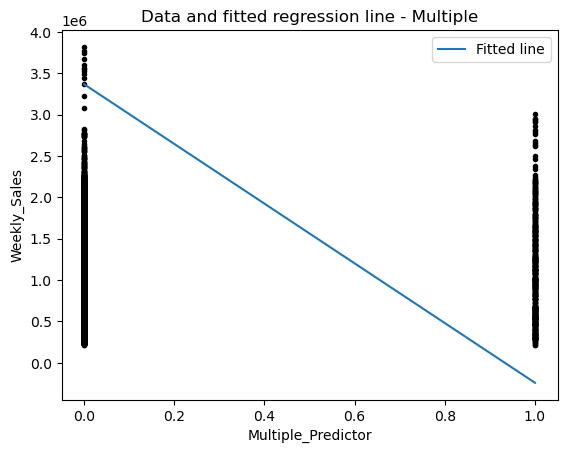

In [56]:
predictors = ["Holiday_Flag", "Store", "logTemperature", "logFuelPrice", "logCPI", "logUnemployment"]
outcome = "Weekly_Sales"
data = df.copy()
results_ = results_sales4.copy()
# linestyles = {0 : "--", 1: "-"}
# c = {0 : "b", 1: "g"}
# markers = {0 : "x", 1: "."}

# Plot the data
plt.scatter(data[predictors[0]], data[outcome], color = "k", marker=".")


# x value predictors value
x_domain = np.linspace(np.min(data[predictors[0]]), np.max(data[predictors[0]]), len(data))

# Calculate the fitted values for two lines regarding the mom_hs (0 and 1)
beta0_hat = results_.loc["Intercept"]["coef"]
beta1_hat = results_.loc[predictors[0]]["coef"]
beta2_hat = results_.loc[predictors[1]]["coef"]
beta3_hat = results_.loc[predictors[2]]["coef"]
beta4_hat = results_.loc[predictors[3]]["coef"]
beta5_hat = results_.loc[predictors[4]]["coef"]
beta6_hat = results_.loc[predictors[5]]["coef"]

fitted_values_multiple = beta0_hat +  beta1_hat + beta2_hat + beta3_hat + beta4_hat + beta5_hat + beta6_hat * x_domain * data[predictors[1]].mean()

# Plot two fitted line
plt.plot(x_domain, fitted_values_multiple, label = f"Fitted line")

# Add a legend and labels
plt.legend()
plt.ylabel(f"Weekly_Sales")
plt.xlabel(f"Multiple_Predictor")

# Add a title and adjust the margins
plt.title("Data and fitted regression line - Multiple")

# Show the plot
plt.show()

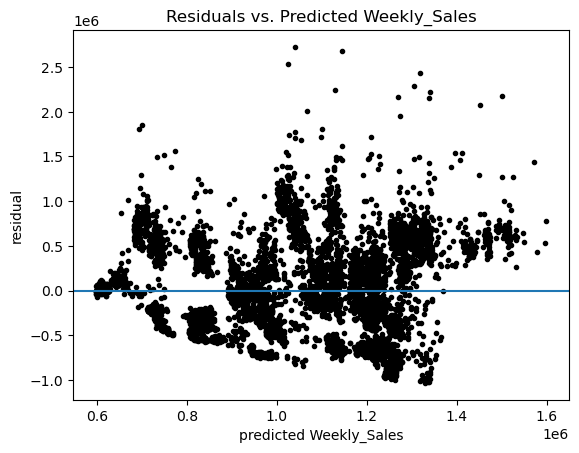

In [57]:
# Residual Plot
plt.scatter(results_model.fittedvalues, results_model.resid, marker=".", c = "k")

# Plot the horizontal line in 0 as the fitted line
plt.axhline([0])

plt.xlabel("predicted Weekly_Sales")
plt.ylabel("residual")
plt.title(f"Residuals vs. Predicted Weekly_Sales");

In [58]:
# Create a class model

ols_multiple2 = StatsmodelsRegressor(smf.ols, "Weekly_Sales ~ Holiday_Flag + Store + logTemperature + logFuelPrice + logCPI + logUnemployment")

In [59]:
# Create k-fold splitter object

kfold = KFold(n_splits=5, shuffle = True, random_state=123)

In [60]:
scores_ols_multiple = cross_val_score(estimator = ols_multiple2,
                                       X = df,
                                       y = df['Weekly_Sales'],
                                       cv = kfold,
                                       scoring = "r2")
scores_ols_multiple = pd.DataFrame(data = scores_ols_multiple, 
                                    columns=["test_rsquared"])
scores_ols_multiple["folds"] = [f"Folds {i+1}" for i in range(5)]
scores_ols_multiple

,test_rsquared,folds
0,0.147180,Folds 1
1,0.122210,Folds 2
2,0.123015,Folds 3
3,0.140091,Folds 4
4,0.148618,Folds 5


In [61]:
scores_ols_multiple["test_rsquared"].mean()

0.1362227722637792